### **PROJECT**

# Description
In this little project, we are going to implement a spam classification method, that is we will assign a lable to each input email as *spam* or *ham* (non-spam)


# The data
The date used contain a set of emails described by a set of features (the data has already been processed and the features computed)

The data is stored as a 'npz' file (we show how to retrieve it bellow)

The file contains:
  - training data, with labels
  - test data without the lables


# To get the data

1. First you have to download the file spam_project.npz in your loacl repository
  - If you use jupiter notebook, you can add the file in your current working directory
  - If you use google colab, you have to add the file to your Google drive 

2. Then you can load the file and access the data

I will describe here the loading procedure for Google colab

In [48]:
# Opening the data file
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd
# First you have mount google drive
from google.colab import drive
from numpy import random
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
# Indicate the path to the file
gdrive_path = '/content/gdrive/MyDrive/' 
# load the spam file
data = np.load(gdrive_path +'spam_project.npz')
test_load = np.load(gdrive_path +'testing_data.npy')

In [29]:
# Now we can acess the data
# NOTE: data is saved as a dictionary, so we need the keys to acces the different arrays
data.files

Exception ignored in: <function NpzFile.__del__ at 0x7f37499a7250>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 213, in __del__
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 208, in close
OSError: [Errno 107] Transport endpoint is not connected


['training_data', 'training_labels', 'testing_data']

As we can see, from above output, we have 3 keys (meaning 3 arrays) in the variable data: 'training_data', 'training_labels' and 'testing_data'

Let's have a look at the training data

In [30]:
train_data = data['training_data']
print(train_data.shape)

(3127, 32)


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We see that we have 3172 training example, describe by 32 features

In [32]:
train_labels = data['training_labels']
#test_data = 

print(train_labels.shape)

(3127, 1)


Silmilarly, we see that we have 3172 training labels. The labels are :
  - 1 for a spam
  - 0 for a ham

### **WHAT YOU HAVE TO D0**

This is a binary classification problem and we will try the following:
1. Apply PCA to reduce the dimensionality of the features to 2
  - Pick frist 2 principal components
  - Plot the data in this 2D space (different color for different class)
  - Apply k-means to the projected data (2D-space)
    - NOTE: Data in the same class, must belong to the same cluster
    - So, it is a good idea to apply k-means to each class separately
      - For example, if k=2, we will have 2 cluster centers for the spam class and 2 cluster centers for the ham class
    - For a sample to classifiy, we find the nearest cluster center among all clusters, and assign the corresponding label
    - NOTE: divide the training data into training and validation and use the validation data to set the best value for k
    - Show your traing and validation accuracies (can plot it as curves)
  - Compute the training accuracy and report it (for the best value for k)

2. Comments?
  - Is projecting to 2D is good idea? why?
  - Apply PCA again, but this time select the number of principal components so that 95% of the data variance is preserved.
  - Apply k-means again to the projected data
  - Compute the training accuracy
  - Conclusion?

3. Testing
  - Apply your best classifier to the test data
    - You must provide the results (the predicted labels) for the test data as a separate file to to submitted with your work



4. **OPTIONAL**:
  - Use GMM (Gaussian Mixture Model) for classification
    - Fit a GMM to the training data (must try different values of K, the number of Gaussians)
      - NOTE: divide the training data into training and validation and use the validation data to set the best value for K
      - For a given sample, compute the distances to the Gaussians, and assign the label of the closest one (use Mahalanobis distance here)
    - Apply your classifier to the test data
      - You must provide the results (the predicted lables) for the thest data as a separate file to to submitted with your work
  


### **WHAT TO SUBMIT**
- Your notebook containing the code, the plots and as much comments as needed
- A file containing the predicted lables for the test data
- Submit a zipped folder named as follows on ecampus:

'SURNAME_NAME.ZIP'

<function matplotlib.pyplot.show(close=None, block=None)>

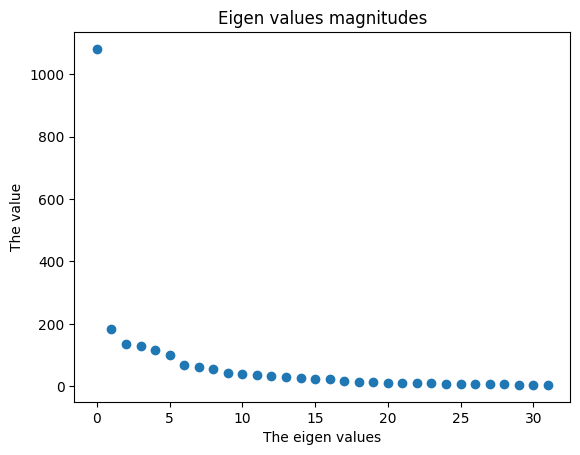

In [33]:
#Applying PCA algorithm to reduce the dimensionality of the features to 2

#calculating the eigen values
U, eig_val, U_T = la.svd(train_data)
num_samples = len(train_data[:,1])
num_features = len(train_data[1,:])

#plotting the eigen values

x = np.linspace(0, 31, num=32)

plt.plot(x, eig_val,'o')
plt.xlabel(f'The eigen values')
plt.ylabel('The value')
plt.title("Eigen values magnitudes")
plt.show

In [34]:
#Centring the data:
mean = np.mean(train_data, axis=0)

centred_data = train_data - mean

# finding the coarience matrix 
#c = 1/num_features * centred_data.T @ centred_data
c = np.cov(centred_data,rowvar=False)
#we decompose the covarience matrix to eigen values and eigen vectors
tmp, eig_val, tmp_T = la.svd(c)
print(c.shape)



(32, 32)


#Plotting the data in this 2D space


<function matplotlib.pyplot.show(close=None, block=None)>

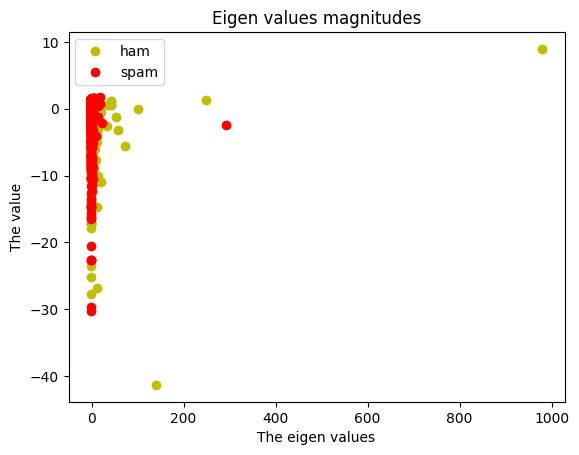

In [35]:
#we take the first 2 principal components from eigen vector matrix
V = tmp[:,0:2]
#To find 
new_train_data = (V.T @ centred_data.T).T
# plotting the features in 2d
new_data = np.concatenate((new_train_data, train_labels),axis=1)

#deviding the data to ham and spam
ham = new_data[new_data[:, -1] == 0, :2].copy()
spam = new_data[new_data[:, -1] == 1, :2].copy()


plt.plot(ham[:,0],ham[:,1],'oy',label='ham')
plt.plot(spam[:,0],spam[:,1],'or',label='spam')
plt.xlabel(f'The eigen values')
plt.ylabel('The value')
plt.title("Eigen values magnitudes")
plt.legend()
plt.show


#Applying k-means to the training data

In [36]:
# defining the kmeans fucntion:
def my_kmeans(X, k):

    
    N, d = X.shape
    eps = 1e-4

    # Set a random seed for reproducibility
    random.seed(42)

    # Initialize centers randomly
    random_numbers = random.permutation(N)[:k]
    cluster_centers = X[random_numbers, :]
    old_cluster_centers = np.zeros((k, d))

    # Initialize a matrix to store the cluster assignments
    classes = np.zeros((N, k), dtype=int)

    # Variable for the number of iterations
    iteration = 0

    while True:
        for i in range(N):
            # Calculate the distance
            dist = np.sum((X[i, :] - cluster_centers) ** 2, axis=1)
            dist = np.sqrt(dist)

            # Assign the point to a cluster
            index = np.argmin(dist)
            classes[i, index] = 1
        
        # Update the cluster centers
        for j in range(k):
            assigned_points = X[classes[:, j] == 1]
            cluster_centers[j, :] = np.mean(assigned_points, axis=0)


        iteration += 1
        
        # Test convergence
        if np.all(la.norm(cluster_centers - old_cluster_centers) <= eps):
            break

        
        old_cluster_centers = cluster_centers

    return classes, cluster_centers


# After applying kmeans we plot the training data and the centers




<function matplotlib.pyplot.show(close=None, block=None)>

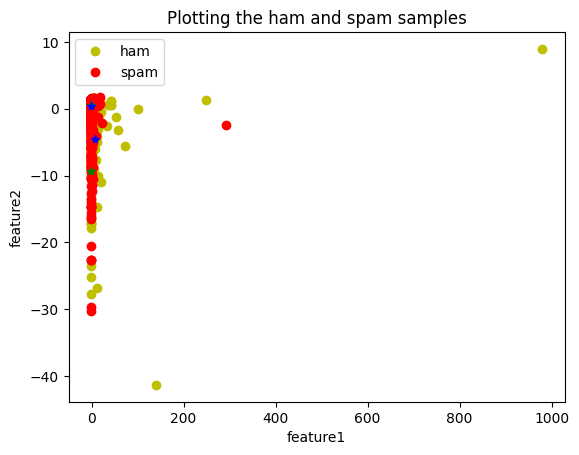

In [37]:
num_centers = 2
classes, center_spam = my_kmeans(spam,num_centers)
classes, center_ham = my_kmeans(ham,num_centers)

plt.plot(ham[:,0],ham[:,1],'oy',label='ham')
plt.plot(spam[:,0],spam[:,1],'or',label='spam')
plt.xlabel(f'The eigen values')
plt.ylabel('The value')
plt.title("Eigen values magnitudes")
plt.legend()


plt.plot(center_spam[:,0], center_spam[:,1], '*g')
plt.plot(center_ham[:,0], center_ham[:,1], '*b')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Plotting the ham and spam samples")
plt.show



#Finding the nearest cluster center among all clusters, and assigning the corresponding label

In [38]:
#calculating the distances from the samples to the centers
def Predict(X,spamCenter,hamCenter,num_samples,num_centers):
  center = np.concatenate((hamCenter,spamCenter),axis=0)
  dis = np.zeros((num_samples,num_centers*2))
  for i in range(num_centers*2):
      cordinates = X-center[i,:]
      power_cord = np.power(cordinates,2)
      dis[:,i]= np.squeeze(np.sqrt(np.array([[sum(row)] for row in power_cord])))

  #Clustring the training data based on the index of lowest distance
  cluster = np.argmin(dis, axis=1)

  #if the index is less then number of centers means from cluster 1 which is ham, else it is from cluster 2 which is spam
  cluster_bin = cluster/num_centers
  cluster_bin[cluster_bin < 1] = 0
  cluster_bin[cluster_bin > 1] = 1
  prd_labels = cluster_bin[np.newaxis,:].T
  return prd_labels



The error on train data is 32%


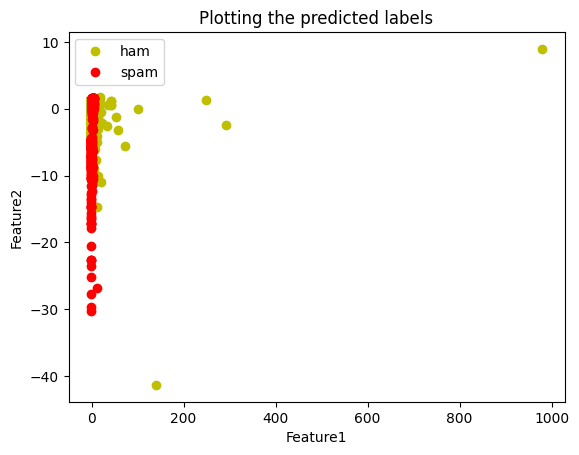

In [39]:
#plotting the predicted labels using the class centers
prd_labels = Predict(new_train_data,center_spam,center_ham,num_samples,num_centers)

data_with_labels = np.concatenate((new_train_data, prd_labels),axis=1)

#deviding the data to ham and spam
ham = data_with_labels[data_with_labels[:, -1] == 0, :2].copy()
spam = data_with_labels[data_with_labels[:, -1] == 1, :2].copy()


plt.plot(ham[:,0],ham[:,1],'oy',label='ham')
plt.plot(spam[:,0],spam[:,1],'or',label='spam')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title("Plotting the predicted labels")
plt.legend()
plt.show

error = sum(np.abs(prd_labels-train_labels))/3127*100
print(f'The error on train data is {int(error)}%')

Deviding the training data to validation and training sets

In [40]:
#we have 3127 samples, so we take 80% for train: 2501 and 20% for validation: 626
my_train_data, vld_data = new_train_data[0:2501], new_train_data[2501:3127]
my_train_labels, vld_labels = train_labels[0:2501], train_labels[2501:3127]

my_train_data_with_labels = np.concatenate((my_train_data, my_train_labels),axis=1)
new_ham = my_train_data_with_labels[my_train_data_with_labels[:, -1] == 0, :2].copy()
new_spam = my_train_data_with_labels[my_train_data_with_labels[:, -1] == 1, :2].copy()

#We need a loop where we train then we validate then we check the error 

num_centers = 2
best_center = num_centers
num_samples = vld_data.shape[0]
num_samples_train = my_train_data.shape[0]

min_error = 100
epochs = 9
error_train = np.zeros(epochs)
error_vld = np.zeros(epochs)
for i in range(epochs):
  #train
    classes, center_spam = my_kmeans(new_spam,num_centers)
    classes, center_ham = my_kmeans(new_ham,num_centers)
    prd_labels = Predict(my_train_data,center_spam,center_ham,num_samples_train,num_centers)
    error_train[i] =  sum(np.abs(prd_labels-my_train_labels))/num_samples_train*100
  #test
    prd_labels = Predict(vld_data,center_spam,center_ham,num_samples,num_centers)
    error_vld[i] =  sum(np.abs(prd_labels-vld_labels))/num_samples*100
    best_center = best_center * (error_vld[i] > min_error) + num_centers * (error_vld[i] <= min_error)
    min_error = min(min_error,error_vld[i])
    num_centers+=2



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


<function matplotlib.pyplot.show(close=None, block=None)>

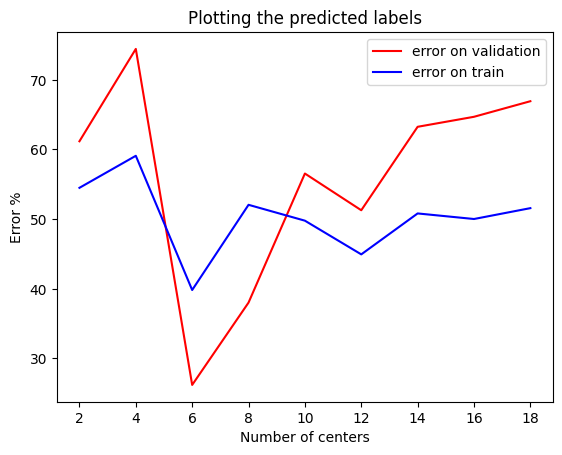

In [41]:
x = np.linspace(2,epochs*2,epochs)
plt.plot(x,error_vld,'r',label='error on validation')
plt.plot(x,error_train,'b',label='error on train')
plt.xlabel('Number of centers')
plt.ylabel('Error %')
plt.title("Plotting the predicted labels")
plt.legend()

plt.show

Computing train accuracy

In [42]:
print(f'The best number of centers is {int(best_center)} with error on validation of: {int(min_error)}%')

The best number of centers is 6 with error on validation of: 26%


In [43]:
num_centers = 6
classes, center_spam = my_kmeans(new_spam,num_centers)
classes, center_ham = my_kmeans(new_ham,num_centers)
prd_labels = Predict(my_train_data,center_spam,center_ham,num_samples_train,num_centers)
error_train =  sum(np.abs(prd_labels-my_train_labels))/num_samples_train*100
print(f'The training accuracy for the best values of k is: {int(error_train)}%')

The training accuracy for the best values of k is: 39%


#Projecting to 2d good idea or not
Since we are getting high error percentages, Projecting to 2d is not a good idea and this is because of the fact that there are other important features are removed from concidiration.

#Finding the best PCA 

In [44]:

# finding the coarience matrix 
c = np.cov(centred_data,rowvar=False)
#we decompose the covarience matrix to eigen values and eigen vectors
tmp, eig_val, tmp_T = la.svd(c)
total = sum(eig_val[:])
var = 0
eigs = 0
i = 0
while var < 95:
    eigs += eig_val[i]
    print(i)
    i +=1
    var= eigs/total *100
print(f'The dimension that preserves 95% of variance is: {i}')

#we take the first 3 principal components from eigen vector matrix
V = tmp[:,0:3]
#To find 
new_train_data = (V.T @ centred_data.T).T


0
1
2
The dimension that preserves 95% of variance is: 3


#Applying k-means again to the projected data


In [45]:
new_train_data_with_labels = np.concatenate((new_train_data, train_labels),axis=1)
new_ham = new_train_data_with_labels[new_train_data_with_labels[:, -1] == 0, :2].copy()
new_spam = new_train_data_with_labels[new_train_data_with_labels[:, -1] == 1, :2].copy()
classes, center_spam = my_kmeans(new_spam,num_centers)
classes, center_ham = my_kmeans(new_ham,num_centers)

num_samples = new_train_data.shape[0]
num_centers = 6
#Predict(new_train_data,center_spam,center_ham,num_samples,num_centers)

#Testing for 2d and 6 centers

In [46]:
#Centring the data:
mean = np.mean(test_load, axis=0)

centred_data = test_load - mean

# finding the coarience matrix 
c = np.cov(centred_data,rowvar=False)
#we decompose the covarience matrix to eigen values and eigen vectors
tmp, eig_val, tmp_T = la.svd(c)
#we take the first 2 principal components from eigen vector matrix
V = tmp[:,0:2]

test_data = (V.T @ centred_data.T).T

num_samples = test_data.shape[0]

classes, center_spam = my_kmeans(new_spam,num_centers)
classes, center_ham = my_kmeans(new_ham,num_centers)
prd_labels = Predict(test_data,center_spam,center_ham,num_samples,num_centers)



#We find the best PCA

#Saving the obtained results in a separate folder


In [49]:
df = pd.DataFrame(prd_labels)
df.to_csv('prediction_results.csv', index=False)